In [75]:
import pathlib
import pandas as pd
import bagpy.bagreader
import datetime


import matplotlib.pyplot as plt

In [11]:
data_dir = pathlib.Path('/Users/baart_f/data/3me/experiment3/20230412/20230412_maxvg_adjustingGuidancetest')

bags = {}
for f in data_dir.glob('*.bag'):
    bag = bagpy.bagreader(str(f))
    bags[f.stem] = bag

[INFO]  Data folder /Users/baart_f/data/3me/experiment3/20230412/20230412_maxvg_adjustingGuidancetest/20230412_maxvg_adjustingGuidancetest1 already exists. Not creating.
[INFO]  Successfully created the data folder /Users/baart_f/data/3me/experiment3/20230412/20230412_maxvg_adjustingGuidancetest/20230412_maxvg_adjustingGuidancetest2.
[INFO]  Successfully created the data folder /Users/baart_f/data/3me/experiment3/20230412/20230412_maxvg_adjustingGuidancetest/20230412_maxvg_adjustingGuidancetest3.
[INFO]  Successfully created the data folder /Users/baart_f/data/3me/experiment3/20230412/20230412_maxvg_adjustingGuidancetest/20230412_maxvg_adjustingGuidancetest4.
[INFO]  Successfully created the data folder /Users/baart_f/data/3me/experiment3/20230412/20230412_maxvg_adjustingGuidancetest/20230412_maxvg_adjustingGuidancetest5.


{'20230412_maxvg_adjustingGuidancetest1': <bagpy.bagreader.bagreader at 0x28fbbd2b0>,
 '20230412_maxvg_adjustingGuidancetest2': <bagpy.bagreader.bagreader at 0x292ee4100>,
 '20230412_maxvg_adjustingGuidancetest3': <bagpy.bagreader.bagreader at 0x2933b8d60>,
 '20230412_maxvg_adjustingGuidancetest4': <bagpy.bagreader.bagreader at 0x293ea93d0>,
 '20230412_maxvg_adjustingGuidancetest5': <bagpy.bagreader.bagreader at 0x29487a490>}

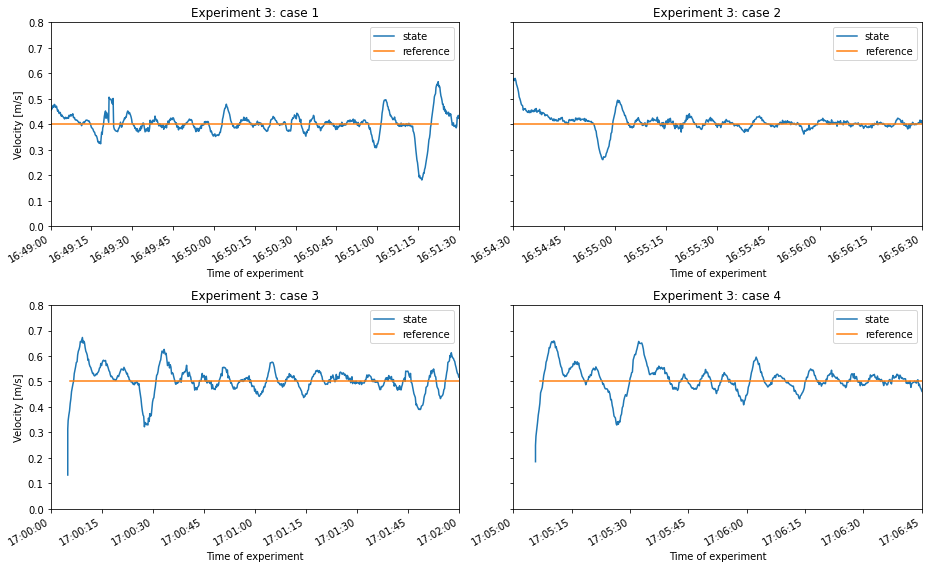

In [100]:


cases = [
    {
        "case": 1, 
        "key": "20230412_maxvg_adjustingGuidancetest2", 
        "t_start": datetime.datetime(2023, 4, 12, 16, 49),
        "t_stop": datetime.datetime(2023, 4, 12, 16, 51, 30)
    },
    {
        "case": 2, 
        "key": "20230412_maxvg_adjustingGuidancetest3",
        "t_start": datetime.datetime(2023, 4, 12, 16, 54, 30),
        "t_stop": datetime.datetime(2023, 4, 12, 16, 56, 30)
    },
    {
        "case": 3, 
        "key": "20230412_maxvg_adjustingGuidancetest4",
        "t_start": datetime.datetime(2023, 4, 12, 17, 0, 0),
        "t_stop": datetime.datetime(2023, 4, 12, 17, 2, 0)
    },
    {
        "case": 4, 
        "key": "20230412_maxvg_adjustingGuidancetest5",
        "t_start": datetime.datetime(2023, 4, 12, 17, 5, 0),
        "t_stop": datetime.datetime(2023, 4, 12, 17, 6, 45)
    }
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8), sharey=True)

for case, ax in zip(cases, axes.flat):
    bag = bags[case["key"]]
    topics = ['/RAS_TN_DB/state/velocity', '/RAS_TN_DB/reference/velocity']

    dfs = {}
    for topic in topics:
        df = pd.read_csv(bag.message_by_topic(topic))
        df['t'] = df.Time.apply(datetime.datetime.fromtimestamp)
        df['t'] = df['t']
        dfs[topic] = df
        
    rename = {"data_0": "state"}
    state = dfs['/RAS_TN_DB/state/velocity'][['t', 'data_0']].set_index('t').rename(columns=rename)
    rename = {"data_0": "reference"}
    ref = dfs['/RAS_TN_DB/reference/velocity'][['t', 'data_0']].set_index('t').rename(columns=rename)


    state.plot(ax=ax)
    ref.plot(ax=ax)
    ax.set_title(f"Experiment 3: case {case['case']}")
    ax.set_xlim(case["t_start"], case["t_stop"])
    ax.set_ylabel('Velocity [m/s]')
    ax.set_ylim(0, 0.8)
    ax.set_xlabel('Time of experiment')
fig.tight_layout()
